<a href="https://colab.research.google.com/github/hanahh080601/Colab/blob/main/SVM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving svm_sample_classification.csv to svm_sample_classification.csv


In [ ]:
df = pd.read_csv('/content/svm_sample_classification.csv')
data_x = df[['Height', 'Weight']]
scaler = StandardScaler()
data_x = scaler.fit_transform(data_x)
data_x = np.asarray(data_x)
data_y = df[["Type"]]
data_y = np.asarray(data_y).reshape(len(data_y),)

In [ ]:
clf = SVC(kernel='linear', C=5)
result = clf.fit(data_x, data_y)
print(clf.support_vectors_)

[[-0.60152657 -0.60091522]
 [-0.18918508 -0.60091522]
 [-0.29227046  0.15138647]]


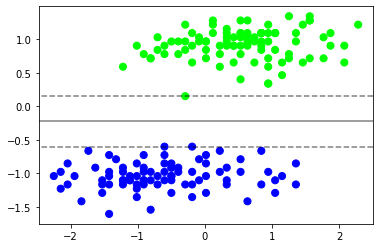

In [ ]:
def plot_svc_decision_function(clf, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=50, cmap='brg');
plot_svc_decision_function(clf)
plt.show()

In [ ]:
parameter_candidates = [
  {'C': [5, 10, 100, 1000], 'kernel': ['linear']},
]

clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(data_x, data_y)
print('Best score:', clf.best_score_)
print('Best C:',clf.best_estimator_.C)

Best score: 1.0
Best C: 5
